In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Вариант 25

# данные для задания 1

fD_0 = np.array([
    [3.2, -4.3, 2, -1.9,  1.2, -3.3],
])
fD_0 = np.reshape(fD_0,(6,1))
fD_1 = np.array([
    [-2.9, 4.1, 0.5, -3.4, 4.8, -2.5]
])
fD_1 = np.reshape(fD_1,(6,1))
fLabel = np.reshape(np.array([0, 1, 1, 0, 1, 0]),(6,1))
fData = np.hstack([fD_0, fD_1])

# данные для задания 2

newArr = np.array([[0,-4],[2,3],[1,5],[4,2],[3,2],[-1,-1]])
fData2 = np.row_stack((fData, newArr))
newArrLabel = np.array([[0],[0],[1],[1],[0],[1]])
fLabel2 = np.row_stack((fLabel, newArrLabel))

# данные для задания 3

sD_0 = np.array([
    [0.7, 2.3, -2.6, -4.2,  1.6,  3.9,  2.6,  4.2]
])
sD_1 = np.array([
    [3.4, 0.8,  1.6,   1.2,  2.2,  4.8,  0.8,  0.8]
])
sL_0 = np.array([
    [1, 0, 1, 1, 0, 1, 0, 0]
])
sL_1 =  np.array([
    [1, 1, 1, 1, 1, 0, 1, 0]
])
sD_0 = np.reshape(sD_0,(8,1))
sD_1 = np.reshape(sD_1,(8,1))
sL_0 = np.reshape(sL_0,(8,1))
sL_1 = np.reshape(sL_1,(8,1))
sData = np.hstack([sD_0, sD_1])
sLabel = np.hstack([sL_0, sL_1])

In [141]:
def mean_absolute_error(predicts, targets):
    return np.mean(np.mean(np.abs(predicts - targets), axis=0))

class Perceptron:
    def __init__(self,input_size, learningRate):
        self.W = np.random.random(input_size)
        self.b = 0
        self.learningRate = learningRate
        
        
    def fit(self,train_data, train_targets):
        for x, y in zip(train_data, train_targets):
            p   = self.predict(x)
            err = y - p
            print(err)
            self.W += self.learningRate * err * x
            self.b += self.learningRate * err
    
    def predict(self,input_data):
        p = np.sum(np.multiply(self.W, input_data)) + self.b 
        return np.heaviside(p, 0)
    
    def get_line(self, points):
        return np.array([-(self.b + self.W[0] * x) / self.W[1] for x in points])

class neuralNetwork:
    def __init__(self, neuronsAmount, percepsAmount, epoch, lr):
        self.perceps = [Perceptron(neuronsAmount, lr) for _ in range(percepsAmount)]
        self.epoch = epoch
        

    def fit(self, X, Y):
        for _ in range(self.epoch):
            for i, perc in enumerate(self.perceps):
                perc.fit(X, Y[:, i])
    
    def get_perceptron_lines(self, points):
        print(np.array([p.get_line(points) for p in self.perceps]))
        return np.array([p.get_line(points) for p in self.perceps])
    
    def predict(self, inputData):
        result = []
        for perc in self.perceps:
            result.append([perc.predict(x) for x in inputData])
        return np.array(result).T

#### 1 задание

In [142]:
nnet = neuralNetwork(2, 1, 20, 0.1)
nnet.fit(fData, fLabel)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [143]:
predicts = nnet.predict(fData)
print("Predictions: ", predicts)
print("Error:       ", mean_absolute_error(predicts, fLabel))

Predictions:  [[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]]
Error:        0.0


[[ 2.37116114 -2.37116114]]


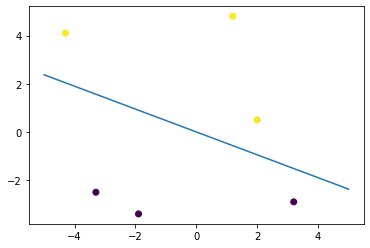

In [144]:
plt.scatter(fData[:,0], fData[:,1], c=fLabel)
points = [-5, 5]
for line in nnet.get_perceptron_lines(points):
    plt.plot(points, line)

#### 2 задание

In [145]:
nnet = neuralNetwork(2, 1, 20, 0.1)
nnet.fit(fData2, fLabel2)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1.0
0.0
0.0
-1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-1.0
1.0
0.0
-1.0
1.0
0.0
0.0
1.0
0.0
0.0
-1.0
0.0
-1.0
0.0
1.0
-1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-1.0
1.0
0.0
-1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-1.0
1.0
0.0
-1.0
0.0
0.0
0.0
1.0
-1.0
0.0
0.0
0.0
-1.0
0.0
1.0
-1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-1.0
1.0
0.0
-1.0
0.0
0.0
0.0
1.0
0.0
0.0
-1.0
0.0
-1.0
0.0
1.0
-1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-1.0
1.0
0.0
-1.0
0.0
0.0
0.0
1.0
0.0
0.0
-1.0
0.0
-1.0
0.0
0.0
-1.0
0.0
0.0
0.0
1.0
-1.0
0.0
0.0
0.0
-1.0
1.0
0.0
-1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-1.0
1.0
1.0
-1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-1.0
0.0
1.0
-1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-1.0
1.0
0.0
-1.0
0.0
0.0
0.0
1.0
0.0
0.0
-1.0
0.0
-1.0
0.0
1.0
-1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-1.0
1.0
0.0
-1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-1.0
1.0
0.0
-1.0
0.0
0.0
0.0
1.0
0.0
0.0
-1.0
0.0
-1.0
0.0
1.0
-1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-1.0
1.0
0.0
-1.0
0.0
0.0
0.0
1.0
0.0
0.0
-1.0
0.0
-1.0
0.0
0.0
-

In [135]:
predicts = nnet.predict(fData2)
print("Predictions: ", predicts)
print("Error:       ", mean_absolute_error(predicts, fLabel2))

Predictions:  [[0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]]
Error:        0.3333333333333333


[[-7.31774316  9.41374077]]


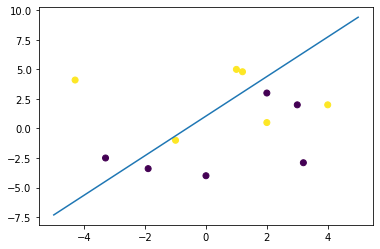

In [136]:
plt.scatter(fData2[:,0], fData2[:,1], c=fLabel2)
points = [-5, 5]
for line in nnet.get_perceptron_lines(points):
    plt.plot(points, line)

#### 3 задание

In [137]:
nnet = neuralNetwork(2, 2, 50, 0.1)
nnet.fit(sData, sLabel)

In [138]:
predicts = nnet.predict(sData)
print("Predictions: ", predicts)
print("Error:       ", mean_absolute_error(predicts, sLabel))

Predictions:  [[1. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 0.]]
Error:        0.0


[3, 1, 3, 3, 1, 2, 1, 0]
[[ -2.85334976   5.31747695]
 [156.78717783 -31.9199143 ]]


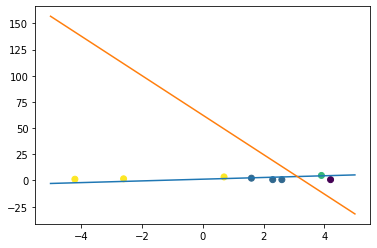

In [139]:
print(list(map(lambda x : x[0]*2 + x[1], sLabel)))
plt.scatter(sData[:,0], sData[:,1], c= list(map(lambda x : x[0]*2 + x[1], sLabel)))
points = [-5, 5]
for line in nnet.get_perceptron_lines(points):
    plt.plot(points, line)